In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
df=pd.read_csv("Data/Raw_data/Sales_data.csv")

In [4]:
df


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [5]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (536350, 8)


In [6]:
print(f"first 5 rows of data : {df.head(5)}")

first 5 rows of data :   TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  


In [7]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [8]:
print(df.dtypes)

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object


In [9]:
#df_pro = df.copy()
#df_pro.to_csv("Data/Processed_data/processed_sales_data.csv", index=False)

In [10]:
#df=pd.read_csv("Data/Processed_data/processed_sales_data.csv")

In [11]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [12]:
df['Date'] = pd.to_datetime(df['Date'])  

In [13]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['TransactionNo'] = df['TransactionNo'].astype('string')
df['ProductNo'] = df['ProductNo'].astype('string')

In [14]:
df.dtypes

TransactionNo    string[python]
Date             datetime64[ns]
ProductNo        string[python]
ProductName              object
Price                   float64
Quantity                  int64
CustomerNo              float64
Country                  object
Year                      int32
Month                     int32
Day                       int32
DayOfWeek                 int32
WeekOfYear               UInt32
dtype: object

In [15]:
day_names = {
    0: 'Mon',
    1: 'Tue', 
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
print(df['Date'].dtype)

datetime64[ns]


In [16]:
df['DayName'] = df['Date'].dt.dayofweek.map(day_names)

In [17]:
df['Revenue'] = df['Price'] * df['Quantity']


In [18]:
df['CustomerNo'].unique().shape

(4739,)

In [19]:
df['TransactionNo'].unique().shape

(23204,)

In [20]:
df['ProductNo'].unique().shape

(3768,)

In [21]:
df['Country'].unique().shape

(38,)

In [22]:
df['Date'].unique().shape

(305,)

In [23]:
missing_values=df.isnull().sum()

In [24]:
missing_values

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
Year              0
Month             0
Day               0
DayOfWeek         0
WeekOfYear        0
DayName           0
Revenue           0
dtype: int64

In [25]:
customer_no_null_rows=df[df['CustomerNo'].isnull()==True]

In [26]:
customer_no_null_rows

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,DayOfWeek,WeekOfYear,DayName,Revenue
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom,2019,12,8,6,49,Sun,-1485.60
6512,C581406,2019-12-08,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom,2019,12,8,6,49,Sun,-1857.00
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom,2019,11,8,4,45,Fri,-44.25
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom,2019,11,3,6,44,Sun,-25.37
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom,2019,10,28,0,44,Mon,-14.50
163160,C569495,2019-10-04,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom,2019,10,4,4,40,Fri,-21.47
190598,C567518,2019-09-20,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom,2019,9,20,4,38,Fri,-27.62
192284,C567518,2019-09-20,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom,2019,9,20,4,38,Fri,-143.28
242406,C563015,2019-08-11,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom,2019,8,11,6,32,Sun,-1640.00
242407,C563015,2019-08-11,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom,2019,8,11,6,32,Sun,-2255.00


In [27]:
non_positive_quantity=df[df['Quantity']<=0]

In [28]:
non_positive_quantity.shape

(8585, 15)

In [29]:
negative_price=df[df['Price']<=0]

In [30]:
negative_price.shape

(0, 15)

In [31]:
c_prefixed = df[df['TransactionNo'].str.startswith('C')]

In [32]:
c_prefixed

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,DayOfWeek,WeekOfYear,DayName,Revenue
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,2019,12,9,0,50,Mon,-501359.05
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom,2019,12,9,0,50,Mon,-74.28
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom,2019,12,9,0,50,Mon,-66.44
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom,2019,12,9,0,50,Mon,-30.95
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom,2019,12,9,0,50,Mon,-6.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,2018,12,1,5,48,Sat,-37.92
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,2018,12,1,5,48,Sat,-42.27
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,2018,12,1,5,48,Sat,-11.74
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,2018,12,1,5,48,Sat,-65.40


In [33]:
def check_if_all_cancelled_are_neg_quant():
    cancelled_transactions = df[df['TransactionNo'].str.startswith('C')]
    non_negative_cancelled = cancelled_transactions[cancelled_transactions['Quantity'] >= 0]
    
    if len(non_negative_cancelled) == 0:
        return True
    else:
        return False

In [34]:
check_if_all_cancelled_are_neg_quant()

True

In [35]:
df['IsCancellation'] = df['TransactionNo'].str.startswith('C')

In [36]:
df.isnull().sum()

TransactionNo      0
Date               0
ProductNo          0
ProductName        0
Price              0
Quantity           0
CustomerNo        55
Country            0
Year               0
Month              0
Day                0
DayOfWeek          0
WeekOfYear         0
DayName            0
Revenue            0
IsCancellation     0
dtype: int64

In [37]:
df= df.dropna(subset=['CustomerNo'])

In [38]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo        0
Country           0
Year              0
Month             0
Day               0
DayOfWeek         0
WeekOfYear        0
DayName           0
Revenue           0
IsCancellation    0
dtype: int64

In [39]:
df['Year'].unique()

array([2019, 2018])

In [40]:
def mark_black_friday_period(row):
    date = row['Date']
    
    if (date.year == 2019 and 
        ((date.month == 11 and date.day >= 25) or 
         (date.month == 12 and date.day <= 1))):
        return 1
    
    if (date.year == 2018 and 
        date.month == 11 and 
        date.day >= 19 and 
        date.day <= 25):
        return 1
    
    return 0

In [41]:
df['IsBlackFridayPeriod'] = df.apply(mark_black_friday_period, axis=1)

C:\Users\punee\AppData\Local\Temp\ipykernel_38976\2409068652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsBlackFridayPeriod'] = df.apply(mark_black_friday_period, axis=1)


In [42]:
def mark_christmas_period(row):
    date = row['Date']
    
    if (date.month == 12 and 
        date.day >= 20 and 
        date.day <= 27):
        return 1
    
    return 0

In [43]:
df['IsChristmasPeriod'] = df.apply(mark_christmas_period, axis=1)

C:\Users\punee\AppData\Local\Temp\ipykernel_38976\3485886868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IsChristmasPeriod'] = df.apply(mark_christmas_period, axis=1)


In [44]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Year,Month,Day,DayOfWeek,WeekOfYear,DayName,Revenue,IsCancellation,IsBlackFridayPeriod,IsChristmasPeriod
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,2019,12,9,0,50,Mon,257.64,False,0,0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,2019,12,9,0,50,Mon,383.40,False,0,0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,2019,12,9,0,50,Mon,138.36,False,0,0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,2019,12,9,0,50,Mon,127.80,False,0,0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,2019,12,9,0,50,Mon,71.64,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,2018,12,1,5,48,Sat,-37.92,True,0,0
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,2018,12,1,5,48,Sat,-42.27,True,0,0
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,2018,12,1,5,48,Sat,-11.74,True,0,0
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,2018,12,1,5,48,Sat,-65.40,True,0,0


In [45]:
df.to_csv("Data/Processed_data/processed_sales_data.csv", index=False)

In [46]:
cancelled_transactions = df[df['TransactionNo'].str.startswith('C')]

regular_transactions = df[~df['TransactionNo'].str.startswith('C')]

print(f"Total transactions: {len(df)}")
print(f"Cancelled transactions: {len(cancelled_transactions)}")
print(f"Regular transactions: {len(regular_transactions)}")

cancelled_transactions.to_csv("Data/Processed_data/cancelled_transactions.csv", index=False)
regular_transactions.to_csv("Data/Processed_data/regular_transactions.csv", index=False)


Total transactions: 536295
Cancelled transactions: 8531
Regular transactions: 527764


In [47]:

df=pd.read_csv("Data/Processed_data/regular_transactions.csv")


In [48]:
df_2018 = df[df['Year']==2018]
df_2018_agg = df_2018.groupby('Date')['Revenue'].sum().reset_index()

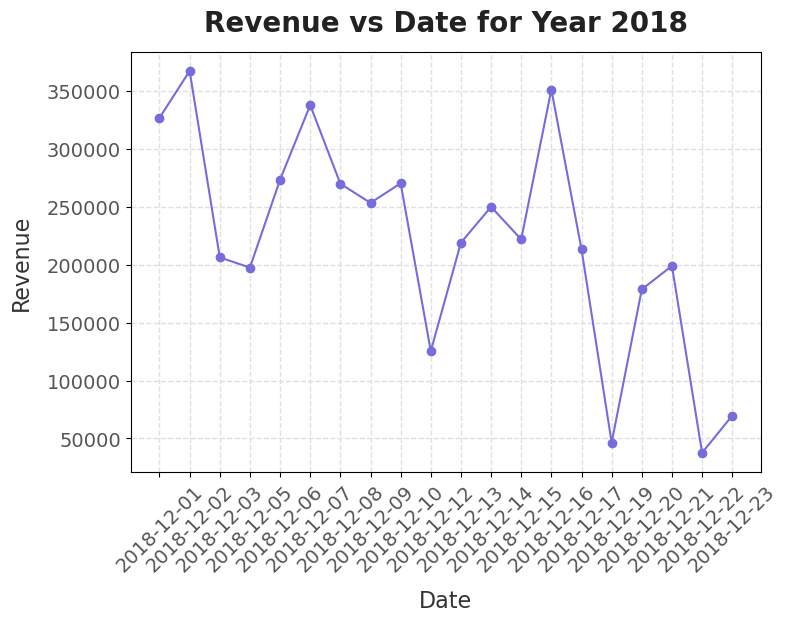

Plot generated successfully for 2018.


In [49]:
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.plot(df_2018_agg['Date'], df_2018_agg['Revenue'], color='#766CDB', marker='o', linestyle='-')
plt.title('Revenue vs Date for Year 2018', pad=15, fontsize=20, weight='semibold', color='#222222')
plt.xlabel('Date', labelpad=10, fontsize=16, weight='medium', color='#333333')
plt.ylabel('Revenue', labelpad=10, fontsize=16, weight='medium', color='#333333')
plt.xticks(rotation=45, fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(color='#E0E0E0', linestyle='--', linewidth=1)
plt.gca().set_axisbelow(True)
plt.show()

print('Plot generated successfully for 2018.')

In [50]:
# Filter for November and December 2019
df_2019 = df[(df['Year'] == 2019) & ((df['Month'] == 11) | (df['Month'] == 12))]

# Aggregate by date to get total revenue per day
df_2019_agg = df_2019.groupby('Date')['Revenue'].sum().reset_index()

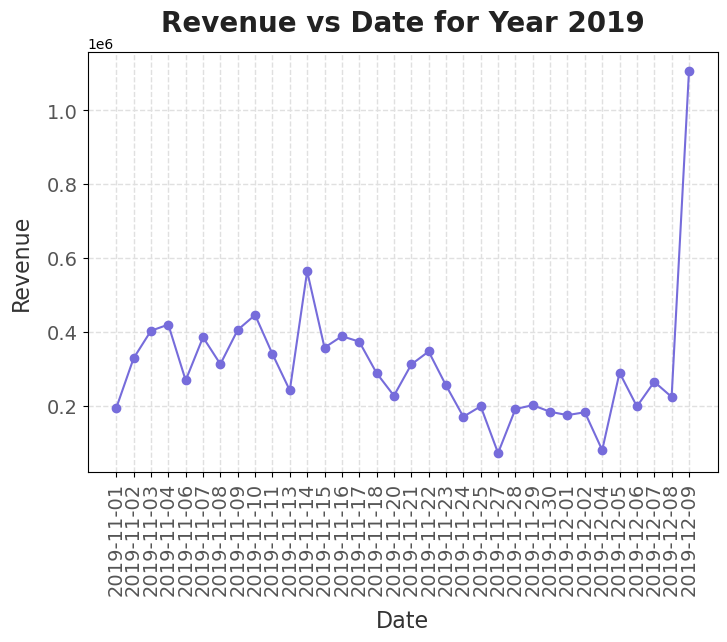

Plot generated successfully for 2019.


In [51]:
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
plt.plot(df_2019_agg['Date'], df_2019_agg['Revenue'], color='#766CDB', marker='o', linestyle='-')
plt.title('Revenue vs Date for Year 2019', pad=15, fontsize=20, weight='semibold', color='#222222')
plt.xlabel('Date', labelpad=10, fontsize=16, weight='medium', color='#333333')
plt.ylabel('Revenue', labelpad=10, fontsize=16, weight='medium', color='#333333')
plt.xticks(rotation=90, fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(color='#E0E0E0', linestyle='--', linewidth=1)
plt.gca().set_axisbelow(True)
plt.show()

print('Plot generated successfully for 2019.')